# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Prepared by: Azis Arijaya

Batch: Zeus DA Online

## Background

Pergerakan nilai mata uang Asing terhadap mata uang Indonensia memiliki perubahan yang fluktuatif, untuk mengukur perubahan nilai mata uang, biasanya menggunakan nilai USD (sebagai mata uang dasar) dibandingnkan dengan nilai mata IDR (sebagai matau uang counter). Pada studi case ini, saya akan mengambil data Kurs US Dollar (USD) terhadap Indonesia Rupiah (IDR) pada bulan Maret 2024 hinngga Agustus 2024. 

>## Business questions
>Bagaimana pergerakan kurs US Dollar (USD) terhadap Indonesia Rupiah (IDR)

## Metode
Dengan Metode Web Scrapping, yaitu metode untuk mengambil data dari situ web secara otommatis. Dengan tujuan:
- untuk pengumupulan konten. Mengambil konten seperti berita, artikel untuk agreagi atau pembuatan database konten.
- untuk penncarian informasi secara spesifik.
- melihat tren pada situs web.

>## Scope
>Mengambil data dari riawayt perubahan rate US Dollar (USD) ke Indonesia Rupiah (IDR) pada website https://www.exchange-rates.org/exchange-rate-history/usd-idr pada bulan Maret 2024 hinngga Agustus 2024.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*
>Kita akan mengambil bagian yg kita butuhkan (biasanya dalam sebuah Class) dari halaman website. 
>1. Lakukan insepct element pada website dengan cara klik kanan terus pilih 'inspect'.
>2. Kemudian cari tabel yang kita pilih dan lihat elemet pada tabel tersebut.
>3. Dicek terlebih dahulu tag-nya apa, bisa berupa 'div', 'a', 'tr', 'td', 'th', dan lain sebagainnya.

In [27]:
#table = soup.find('div', attrs={'class':'inner'})
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:800])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-09-02">
     <span class="nowrap">
      2024-9-2
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-09-02">
     <span class="nowrap">
      2024-9-2
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,554 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,554 IDR
  


Next, we need to find the row length.

> - Find : akan mengambil semua bagian pada code dengan output html
> - find_all : akan mengembalikan data dalam bentuk array

In [26]:
table_kurs = table.find_all('a', attrs={'class':'w'})
#table_kurs
row_length = len(table_kurs)
row_length

129

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [50]:
temp = []  # Initiating a tuple

for i in range(1, row_length):

    # get date
    Kurs_date = table.find_all('a', attrs={'class':'w'})[i].text

    # get conversion    
    Kurs_change = table.find_all('span', attrs={'class':'w'})[i].text
    #Kurs_change = Kurs_change.strip("IDR")     # to remove excess IDR 
    #Kurs_change = Kurs_change.str[-8:]         # untuk mengambil 6 karakter dari belakang saja, tp error, nanti saja saat cleaning

    temp.append((Kurs_date, Kurs_change))
temp

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2024-7-25', '1 U

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

> Karena datanya dari tanggal terbaru ke tanggal kemaren, jadi kita perlu mengurutkan dengan dari waktu terlama ke waktu saat ini.

In [51]:
temp = temp[::-1]
temp

[('2024-3-6', '1 USD = 15,660 IDR'),
 ('2024-3-7', '1 USD = 15,627 IDR'),
 ('2024-3-8', '1 USD = 15,541 IDR'),
 ('2024-3-11', '1 USD = 15,525 IDR'),
 ('2024-3-12', '1 USD = 15,560 IDR'),
 ('2024-3-13', '1 USD = 15,580 IDR'),
 ('2024-3-14', '1 USD = 15,638 IDR'),
 ('2024-3-15', '1 USD = 15,647 IDR'),
 ('2024-3-18', '1 USD = 15,742 IDR'),
 ('2024-3-19', '1 USD = 15,723 IDR'),
 ('2024-3-20', '1 USD = 15,697 IDR'),
 ('2024-3-21', '1 USD = 15,727 IDR'),
 ('2024-3-22', '1 USD = 15,814 IDR'),
 ('2024-3-25', '1 USD = 15,784 IDR'),
 ('2024-3-26', '1 USD = 15,821 IDR'),
 ('2024-3-27', '1 USD = 15,901 IDR'),
 ('2024-3-28', '1 USD = 15,891 IDR'),
 ('2024-3-29', '1 USD = 15,880 IDR'),
 ('2024-4-1', '1 USD = 15,951 IDR'),
 ('2024-4-2', '1 USD = 15,952 IDR'),
 ('2024-4-3', '1 USD = 15,942 IDR'),
 ('2024-4-4', '1 USD = 15,896 IDR'),
 ('2024-4-5', '1 USD = 15,888 IDR'),
 ('2024-4-8', '1 USD = 15,912 IDR'),
 ('2024-4-9', '1 USD = 15,892 IDR'),
 ('2024-4-10', '1 USD = 16,001 IDR'),
 ('2024-4-11', '1 USD 

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [128]:
import pandas as pd

df = pd.DataFrame(temp, columns =('Kurs_date','Kurs_change'))
df.head()

,Kurs_date,Kurs_change
0,2024-3-6,"1 USD = 15,660 IDR"
1,2024-3-7,"1 USD = 15,627 IDR"
2,2024-3-8,"1 USD = 15,541 IDR"
3,2024-3-11,"1 USD = 15,525 IDR"
4,2024-3-12,"1 USD = 15,560 IDR"


### Data Cleansing

(please change this markdown with your explanation of what you do for data wrangling)
> Untuk membersihkan data ini, dilakukan beberapa langkah:

> 1. Menampilkan nominal kurs IDR tanpa kata 'IDR' dengan cara slicing method .str[]
> 2. menghilangkan decimal point (,.) dari kolom Kurs_change denngan methode .str.replace()
> 3. Mengubah tipe sesuai kebutuhan
> 4. Mengambil data hanya pada Kuartal 2 (April - Mei -Juni)
> 5. Melakukan setting index, dengan index pada kolom 'Kurs_date'

In [129]:
# Data Cleaning Step 1 & 2

df['Kurs_change'] = df['Kurs_change'].str[-10:-4]
#df['Kurs_change'] = df['Kurs_change'].str.strip(",.")
df['Kurs_change'] = df['Kurs_change'].str.replace(',','')
df.head()

,Kurs_date,Kurs_change
0,2024-3-6,15660
1,2024-3-7,15627
2,2024-3-8,15541
3,2024-3-11,15525
4,2024-3-12,15560


In [130]:
df.dtypes

Kurs_date      object
Kurs_change    object
dtype: object

In [131]:
# Data cleaning step 3
df['Kurs_date'] = df['Kurs_date'].astype('datetime64[ns]')
df['Kurs_change'] = df['Kurs_change'].astype('float64') 
df.dtypes

Kurs_date      datetime64[ns]
Kurs_change           float64
dtype: object

In [132]:
# Data Cleaning Step 4
#df['Kurs_date'] = df['Kurs_date'][df['Kurs_date'].between('2024-04-01', '2024-06-30')
df2 = df.loc[ '2024-4-1' : '2024-6-31' ,:]
df2

,Kurs_date,Kurs_change


In [133]:
# Data cleaning step 5
df = df.set_index('Kurs_date')
df.tail()

,Kurs_change
Kurs_date,
2024-08-26,15483.0
2024-08-27,15481.0
2024-08-28,15446.0
2024-08-29,15466.0
2024-08-30,15532.0


### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)
> Data yang diambil menggunakan metode Web Scraping dengan data kurs 1 US Dollar (USD) ke nilai Indonesia Rupiah (IDR)
> - Dengan sumbu X adalah waktu dari bulan Maret 2024 hingga 30 Agustus 2024
> - Sumbu Y berupa nilai Indonesia Rupiah (IDR) terhadap 1 USD.

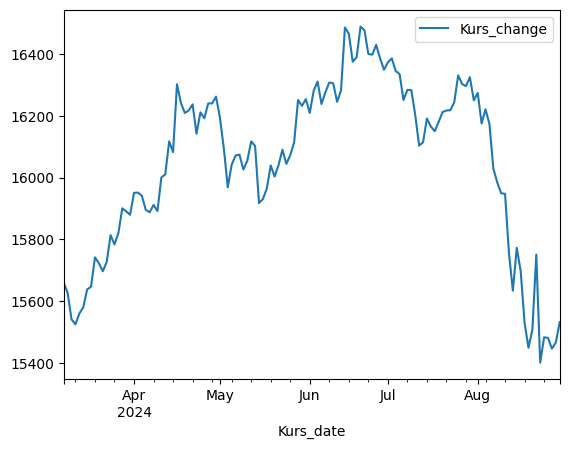

In [134]:
df.plot();

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='Kurs_date'>

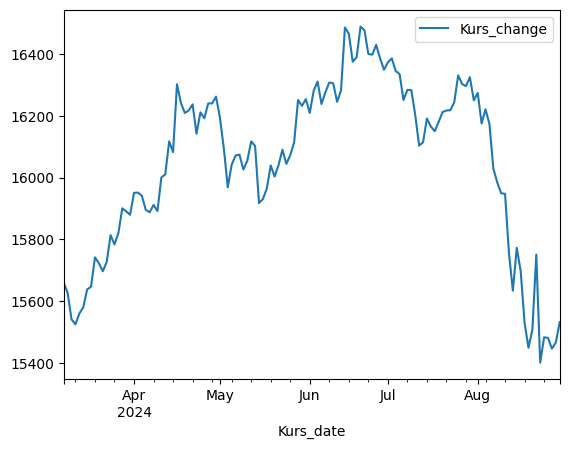

In [87]:
df.plot()

## Analysis

> Dari data visualisasi diatas, dapat diambil beberapa kesimpulan:
> - Pada awal mei 2024, nilai Rupiah Semakin menguat, tetapi pada akhir Mei 2024 nilai rupiah malah semakin melemah menyentuh nilai yang hampir sama seperti awal mei 2024
> - Pada awal agustus 2024, nilai rupiah semakin menguat secara dratis. 
> - Nilai Rupiah paling kuat terdapat pada bulan agustus dan menyetuh harga IDR 15.400 untuk 1 USD.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.